# Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

##  Изучение данных из файлов

In [1]:
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt # импорт библиотеки matplotlib.pyplot для работы с графиками
import numpy as np # импорт библиотеки numpy
from scipy import stats as st # импорт библиотеки scipy
import datetime as dt

import warnings
warnings.filterwarnings(action='ignore') # игнорируем предупреждения 

from datetime import datetime, timedelta # импорт библиотеки для работы с датой

import seaborn as sns # импорт библиотеки seaborn
%matplotlib inline

plt.style.use('seaborn-pastel')# стиль графиков
%config InlineBackend.figure_format = 'retina'# графики сделали лучше

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv') # чтение файла с данными и сохранение в hypothesis
orders = pd.read_csv('/datasets/orders.csv') # чтение файла с данными и сохранение в orders
visitors = pd.read_csv('/datasets/visitors.csv') # чтение файла с данными и сохранение в visitors

In [3]:
def file(title): # функция для изучения таблиц
    display(title.info()) # получение общей информации о данных в таблицах
    display(title.head()) # получение первых 5 строк таблицы
    display(title.describe(include = 'all')) # описание столбцов 
    return  

In [4]:
file(hypothesis) # изучение таблицы hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


,Hypothesis,Reach,Impact,Confidence,Efforts
count,9,9.000000,9.000000,9.000000,9.000000
unique,9,NaN,NaN,NaN,NaN
top,"Запустить собственную службу доставки, что сок...",NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,4.777778,4.777778,5.555556,4.888889
std,NaN,3.153481,3.192874,3.045944,2.803767
min,NaN,1.000000,1.000000,1.000000,1.000000
25%,NaN,3.000000,3.000000,3.000000,3.000000
50%,NaN,3.000000,3.000000,7.000000,5.000000
75%,NaN,8.000000,7.000000,8.000000,6.000000


In [5]:
file(orders) # изучение таблицы orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,transactionId,visitorId,date,revenue,group
count,1.197000e+03,1.197000e+03,1197,1.197000e+03,1197
unique,NaN,NaN,31,NaN,2
top,NaN,NaN,2019-08-05,NaN,B
freq,NaN,NaN,48,NaN,640
mean,2.155621e+09,2.165960e+09,NaN,8.348006e+03,NaN
std,1.229085e+09,1.236014e+09,NaN,3.919113e+04,NaN
min,1.062393e+06,5.114589e+06,NaN,5.000000e+01,NaN
25%,1.166776e+09,1.111826e+09,NaN,1.220000e+03,NaN
50%,2.145194e+09,2.217985e+09,NaN,2.978000e+03,NaN
75%,3.237740e+09,3.177606e+09,NaN,8.290000e+03,NaN


In [6]:
file(visitors) # изучение таблицы visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,date,group,visitors
count,62,62,62.000000
unique,31,2,NaN
top,2019-08-20,A,NaN
freq,2,31,NaN
mean,NaN,NaN,607.290323
std,NaN,NaN,114.400560
min,NaN,NaN,361.000000
25%,NaN,NaN,534.000000
50%,NaN,NaN,624.500000
75%,NaN,NaN,710.500000


### Вывод

Согласно документации к данным: 

Таблица `hypothesis` (9 гипотез по увеличению выручки интернет-магазина с указанными параметрами):

* `Hypothesis` — краткое описание гипотезы;;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

Таблица `orders`:

* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.


Таблица `visitors`:

* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

В таблице `hypothesis` столбцы необходимо привести к нижнему регистру. В таблицах `orders`, `visitors` столбец `date` изменить формат данных. Во всех таблицах отсутвует пропуски.

## Предобработка данных

In [7]:
hypothesis.columns = [x.lower().replace(' ', '_') for x in hypothesis.columns] # название столбцов привели к нижнему регистру

In [8]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d') # изменили  тип данным
)

In [9]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d') #изменили  тип данным
)

In [10]:
visitors.name = 'visitors'
orders.name = 'orders'
hypothesis.name = 'hypothesis'
title = [visitors, orders, hypothesis] # проверка на дубликаты
for df in title:
    print('Дубликаты таблицы {}:'.format(df.name), df.duplicated().sum())

Дубликаты таблицы visitors: 0
Дубликаты таблицы orders: 0
Дубликаты таблицы hypothesis: 0


In [11]:
title = [visitors, orders, hypothesis] # проверка на размерность
for df in title:
    print('Размер таблицы {}:'.format(df.name), df.shape)

Размер таблицы visitors: (62, 3)
Размер таблицы orders: (1197, 5)
Размер таблицы hypothesis: (9, 5)


In [12]:
title = [visitors, orders, hypothesis] # проверка на пропуски
for df in title:
    print('Процент пропусков по столбцам {}:'.format(df.name), round((df.isna().mean()*100),2))

Процент пропусков по столбцам visitors: date        0.0
group       0.0
visitors    0.0
dtype: float64
Процент пропусков по столбцам orders: transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64
Процент пропусков по столбцам hypothesis: hypothesis    0.0
reach         0.0
impact        0.0
confidence    0.0
efforts       0.0
dtype: float64


### Вывод

В таблицах отсуствуют дубликаты. Заменили в некоторых столбцах типы данных. Также привели название столбцов к единому формату. Пропуски в данных отсуствуют.

## Приоритизация гипотез

### Применяем фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

`ICE` (влияние, уверенность, усилия).

In [13]:
pd.set_option('display.max_colwidth', 130) # текст в ячейке отражался полностью вне зависимости от длины 

In [14]:
hypothesis # вывод всех гипотез

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [15]:
ice_score = (hypothesis.impact * hypothesis.confidence) / hypothesis.efforts # расчет приоритизации задач методом ICE

In [16]:
ice_score.sort_values(ascending = False) # вывод на экран результаты

8    16.200000
0    13.333333
7    11.200000
6     8.000000
2     7.000000
1     2.000000
5     1.333333
3     1.125000
4     1.000000
dtype: float64

### Применяем фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

`RICE` ( влияние, уверенность, усилия)

In [17]:
rice_score = (hypothesis.reach * hypothesis.impact * hypothesis.confidence) / hypothesis.efforts # расчет приоритизации задач методом RICE

In [18]:
rice_score.sort_values(ascending = False) # вывод на экран результаты

7    112.0
2     56.0
0     40.0
6     40.0
8     16.2
3      9.0
1      4.0
5      4.0
4      3.0
dtype: float64

### Вывод

С помощью способов приоритизации задач проанализированы гипотезы. С помощью метода `ICE` самая приоритетная является **8 гипотеза**. Но в методе `RICE` приоритеная **7 гипотеза**. Обусловлено это тем , что  в методе `RICE` учитывается параметр `reach`(охват пользователей по 10-балльной шкале). В **7 гипотезе**  по этому параметру стоит самая высокая оценка. 

## Анализ A/B-теста

### Построем график кумулятивной выручки по группам. Сделаем вывод и предположение.

In [19]:
orders.groupby('group')['visitorId'].nunique() # группируем по  количество id  по группам

group
A    503
B    586
Name: visitorId, dtype: int64

In [20]:
 order_filtred = orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index() # посморим какое количество visitorId присуствует о обеих группах

In [21]:
 order_filtred.groupby('group').agg({'visitorId' : 'nunique'}) # группируем данные по количеству уникальных значений

,visitorId
group,
1,973
2,58


In [22]:
#ab_list = order_filtred[order_filtred['group']==2]['visitorId'].tolist()
#orders = orders.query('visitorId not in @ab_list') # фильтруем  visitorId ,которые присуствуют в обеих группах исследования

In [23]:
orders.groupby('group')['visitorId'].count() # размер исследуемых групп

group
A    557
B    640
Name: visitorId, dtype: int64

In [24]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [25]:
cumulativeData.shape # размер таблицы

(62, 6)

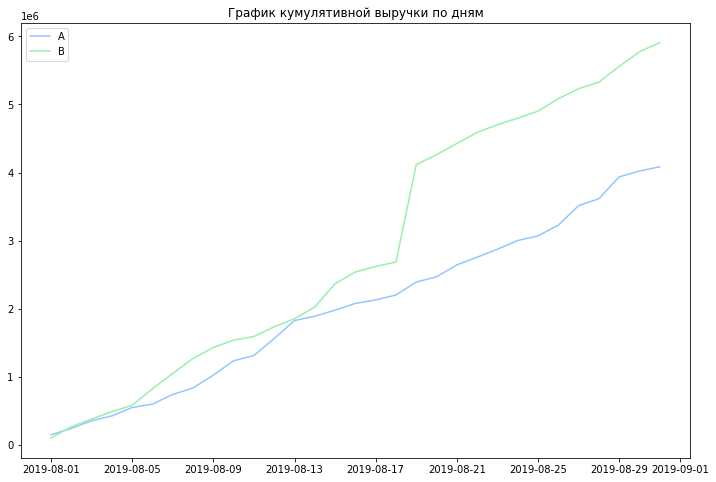

In [26]:
plt.figure(figsize=(12,8)) # размер  графика
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по дням')
plt.legend() 
plt.show();

#### Вывод

По графику видно,что выручка **растет**. В группе **В** виден  резкий **всплеск** выручки начиная с 2019-08-19. Возможно в этот период пользователи  группы **В** совершили больше заказов либо заказы стали дороже.

### Построем график кумулятивного среднего чека по группам. Сделаем вывод и предположение.

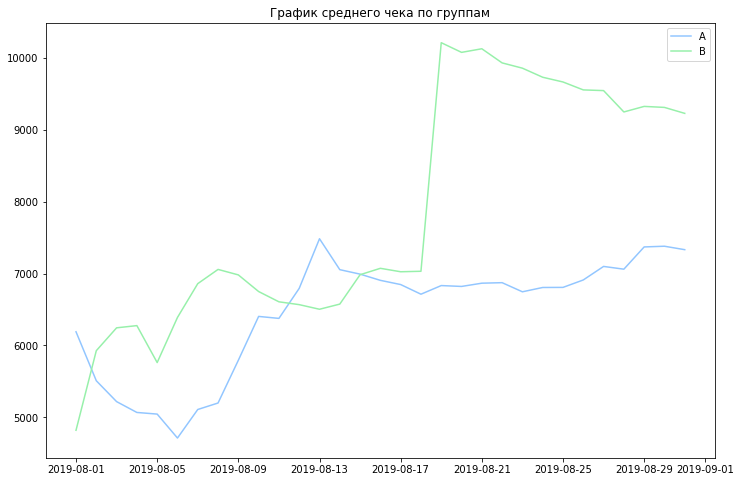

In [27]:
plt.figure(figsize=(12,8)) # размер  графика
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График среднего чека по группам')
plt.legend();

#### Вывод

Средний чек группы **В** на 2019-08-19 показывает **резкий подъем**.Также наблюдается подъем среднего чека и в группе **А**, но более **плавно**,в течение 8 дней. Далее к конце теста средний чек  группы В **снижается**. Возможно такого вида всплеки обуславливаются, что в эти дни учитывались **дорогие** заказы.

### Построем график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем вывод и предположение.

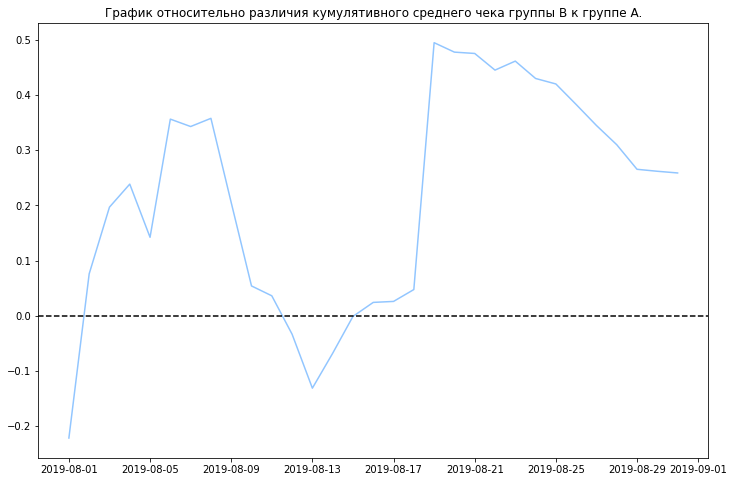

In [28]:
plt.figure(figsize=(12,8)) # размер  графика
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительно различия кумулятивного среднего чека группы B к группе A.');

#### Вывод

На графике видны резкие всплески ,это свидетельствет об **аномалиях** в данных.

### Построем график кумулятивной конверсии по группам. Сделаем выводы и предположение.

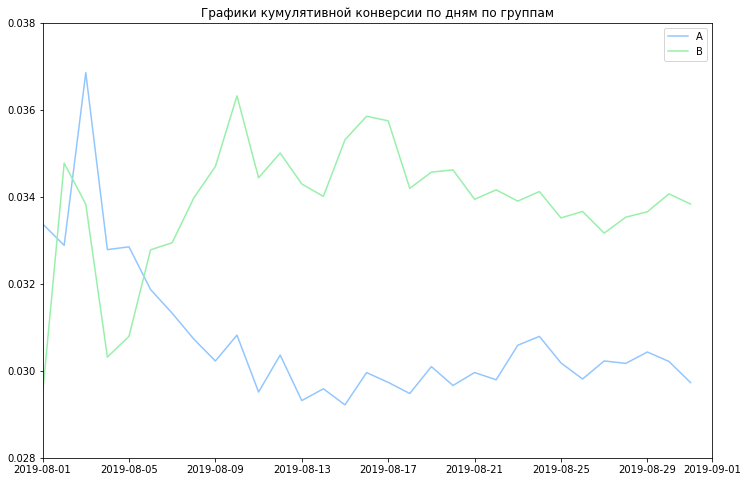

In [57]:
plt.figure(figsize=(12,8)) # размер  графика
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.028, 0.038])
plt.title('Графики кумулятивной конверсии по дням по группам');


#### Вывод

Конверсии обеих групп  в начале теста **сильно** колеблятся. Далее обе группы зафиксировались около **одного** значения. При чем группа **В** расположено выше,чем группа **А**.

### Построем график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем вывод и предположение.

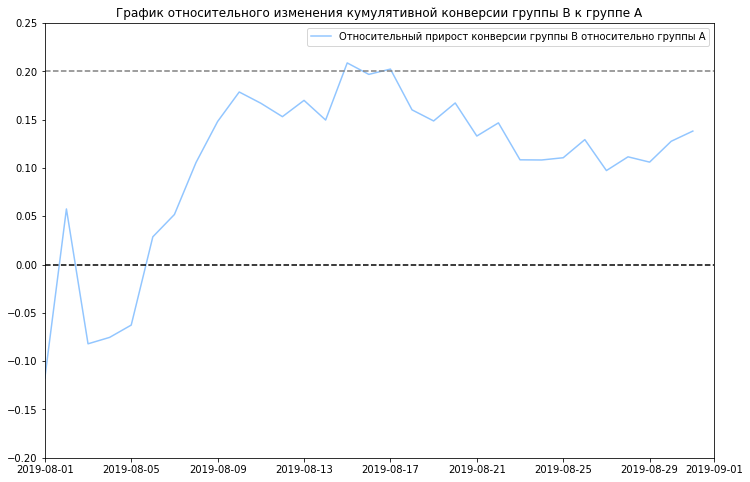

In [30]:
plt.figure(figsize=(12,8)) # размер  графика
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A');
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.2, 0.25]);

#### Вывод

В начале теста группа В проигрывала группе А. Но в дальнейшем конверсия была выше у группы В. 

### Построем точечный график количества заказов по пользователям. Сделаем вывод и предположение.

In [31]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']


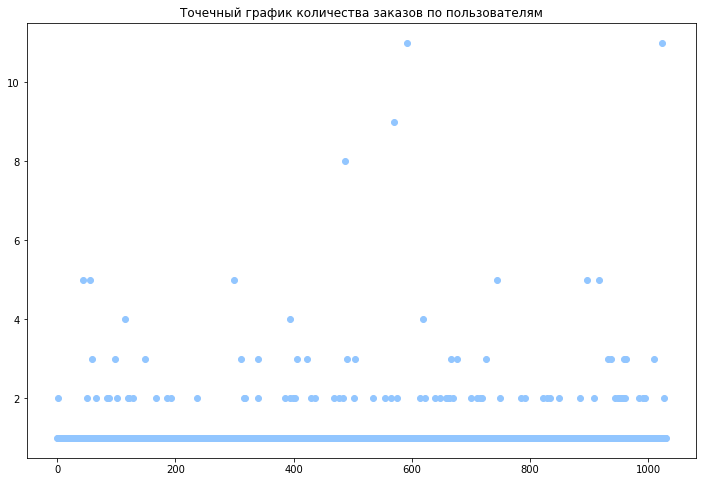

In [32]:
plt.figure(figsize=(12,8)) # размер  графика
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))# значения по горизонтальной оси
plt.title('Точечный график количества заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders']);# точечная диаграмма

#### Вывод

С помощью графика видим ,что некоторые пользователи совершаю более 4 заказов.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [33]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


#### Вывод

**Менее 1 %** совершают более 4 заказов. Следовательно отбросим  пользователей совершивших  более **2 заказов**.

### Построем точечный график стоимостей заказов. Сделаем вывод и предположение.

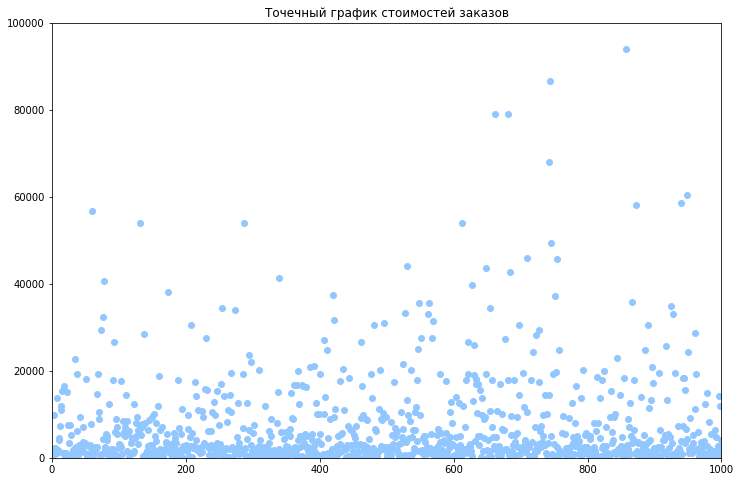

In [59]:
plt.figure(figsize=(12,8)) # размер  графика
x_values = pd.Series(range(0,len(orders['revenue'])))# значения по горизонтальной оси
plt.title('Точечный график стоимостей заказов');
plt.scatter(x_values,orders['revenue'])
plt.axis( [0,1000,0, 100000]);# точечная диаграмма


#### Вывод

По графику видим,что аномальные значения находятся в диапозоне от 20000 до 100000.

In [62]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


#### Вывод

Исключим из исследования значения `revenue` выше **28000**.

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположение.

In [36]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Название столбцов:
* `date` — дата;
* `ordersPerDateA` — количество заказов в выбранную дату в группе A;
* `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
* `ordersPerDateB` — количество заказов в выбранную дату в группе B;
* `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
* `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
* `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
* `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
* `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
* `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
* `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
* `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
* `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

Создаем переменные `ordersByUsersA` и `ordersByUsersB` со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. 

In [37]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Проверим полученные таблицы на нормальности **методом Шапиро-Уилка**.

In [38]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sampleA)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение в группе А не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение в группе А не нормально


In [39]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sampleB)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение в группе В не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение в группе В не нормально


Гипотезы: 
* Нулевая гипотеза: **Распределения выборки равны**. 
* Альтернативная гипотеза: **Распределения выборки не равны**.

Исследуемые  распределения случайных величин  отличается от нормального распределения , в связи с этим использовали **непараметрический тест Манна-Уитни**

Уровень значимости: $\alpha = 0.05$

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [40]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(sampleA, sampleB)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.016792355056752608
Отвергаем нулевую гипотезу: разница статистически значима


In [41]:
print('Относительный прирост конверсии группы В '"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Относительный прирост конверсии группы В 0.138


#### Вывод

Рассмотренные данные по конверсии по *сырым* данным распределены **не нормально**, что свидетельствует о выбросах. Нулевую гипотезу о равенстве в конверсии между группами  отвергнаем. Статистически значимая разница между двумя группами существует.
Относительный прирост конверсии группы В составляет **13,8 %**.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположение.

* Нулевая гипотеза **Н0**:  средний чек групп  **А** и **В** не отличаются друг от друга.
* Альтернативная гипотеза **Н1** : средний чек групп **А** и **В** значимо различны.

Проверим полученные таблицы на нормальности **методом Шапиро-Уилка**.

In [42]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(orders[orders['group']=='A']['revenue'])
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение в группе А не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  1.739703399801917e-34
Отвергаем нулевую гипотезу: распределение в группе А не нормально


In [43]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(orders[orders['group']=='B']['revenue'])
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение в группе B не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение в группе B не нормально


Исследуемые  распределения случайных величин  отличается от нормального распределения , в связи с этим использовали **непараметрический тест Манна-Уитни**

Уровень значимости: $\alpha = 0.05$

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [44]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.7292909855432458
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [45]:
print('Относительный прирост конверсии группы В ''{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

Относительный прирост конверсии группы В 0.259


In [63]:
orders[orders['group']=='B']['revenue'].mean()

9230.875

In [64]:
orders[orders['group']=='A']['revenue'].mean()

7333.578096947936

#### Вывод

Рассмотренные данные по среднего чека по *сырым данным* распределены **не нормально**, что свидетельствует о выбросах. Значение *p-value*  получилось достоточно большим ,поэтому оснований отвергнуть нулевую гипотезу о равенстве долей нет. Средний чек по группам  **А** и **В** различается **незначимо**. Средний чек  группы **В** выше на  **25,9 %**, чем у группы **А**.  

Это можно обусловить тем,что в данных присуствуют выбросы,которые искажают результат.

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем вывод и предположение.

Выводим количество аномальных пользователей.

In [75]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


Всего **74** аномальных пользователей. Далее отбросим эти значения из *сырых* данных.

In [47]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Используем непараметрический тест Манна-Уитни.

* Нулевая гипотеза **Н0**:  конверсия групп  **А** и **В** не отличаются друг от друга.
* Альтернативная гипотеза **Н1** : конверсия групп **А** и **В** значимо различны.

In [48]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.016354213767939312
Отвергаем нулевую гипотезу: разница статистически значима


In [49]:
print('Относительный прирост конверсии группы В '"{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

Относительный прирост конверсии группы В 0.168


#### Вывод

При *очищенных* данных результат теста **не изменился**.  Но разница между группами увеличилась с **13,8%** до **16,8%**.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположение.

Исключим выбросы из исследуемых данных.

In [50]:
simple_A_chek = orders[np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue']

In [51]:
simple_B_chek = orders[np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue']
        

Проверим на нормальность выборки.

In [52]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(simple_A_chek)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение в группе А не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  7.099930373858212e-24
Отвергаем нулевую гипотезу: распределение в группе А не нормально


In [53]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(simple_B_chek)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение в группе В не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  5.7144548565685556e-27
Отвергаем нулевую гипотезу: распределение в группе В не нормально


Исследуемые  распределения случайных величин  отличается от нормального распределения , в связи с этим использовали **непараметрический тест Манна-Уитни**

Уровень значимости: $\alpha = 0.05$

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

* Нулевая гипотеза **Н0**:  средний чек групп  **А** и **В** не отличаются друг от друга.
* Альтернативная гипотеза **Н1** : средний чек групп **А** и **В** значимо различны.

In [54]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(simple_A_chek, simple_B_chek)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.6503271404247081
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [55]:
print('Относительный прирост конверсии группы В '"{0:.3f}".format(simple_B_chek.mean() / simple_A_chek.mean() - 1))

Относительный прирост конверсии группы В -0.033


#### Вывод

При *очищенных* данных результат теста **не изменился**.  Но разница между группами соктилась с **25,9%** до практически **0%**.

## Выводы

1. В *сырых* и *очищенных данных* по конверсии существует **статистическая значимая разница** между группами А и В.

2. Относительный прирост по конверсии по сырым и очищенным данным выше в группе В и  составляет соответвенно **13,8%** и **16.8%**.

2. В свою очередь, по *сырых* и *очищенным данным* по среднему чеку между группами А и В **нет статистически значимого различия**.

3. По графику различия конверсии **наилучшем** образом выглядит **группа В**.

4. По графику различия среднего чека наблюдаем пиковые значения, что обусловленно **аномальными значениями**(дорогие заказы).

6. После *фильтрации* аномальным значений различия между среднем чеком практически **минимальна**. 

Исходя из этого,можно сделать вывод о том ,что тест был успешным. 